In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [18]:
from google.colab import files

uploaded = files.upload()

Saving OIP.jpg to OIP (2).jpg


In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [14]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

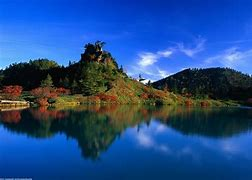

-1

In [20]:
img = cv2.imread('./OIP.jpg')
cv2_imshow(img)
cv2.waitKey(0)

In [21]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.medianBlur(gray,5)
edges=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,9)


In [22]:
color=cv2.bilateralFilter(img,9,300,300)


In [23]:
cartoon=cv2.bitwise_and(color,color,mask=edges)


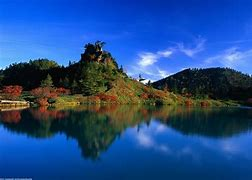

-1

In [24]:
cv2_imshow(img)
cv2.waitKey(0)


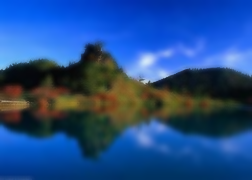

In [25]:
cv2_imshow(color)



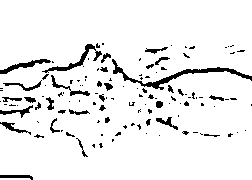

-1

In [26]:
cv2_imshow(edges)
cv2.waitKey(0)

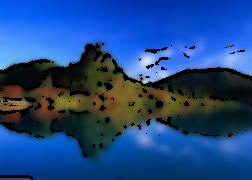

-1

In [27]:
cv2_imshow(cartoon)
cv2.waitKey(0)